This colab consists of the following implemented using Numpy:

- 3 layer neural network
- 2 variable based non linear equation(quadratic non linear equation)
- also 3 variable based non linear equation(cubic non linear equation)
- Relu for non-linear activation function, implemented chain rule based gradient propagation
- used appropriate number of neurons and epochs


In [1]:
!pip install --upgrade umap-learn
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 745.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

Part A : 3 layer Neural network for non-linear regression from scratch using Numpy

Plotting 3d non linear quadratic data. Weights as 5, 7.

n denotes number of input data points

d denotes dimension

x is the set random n number of points generated in d dimensions

calculating actual values of y as y_true using x, actuals weights and bias

plotting x and y

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


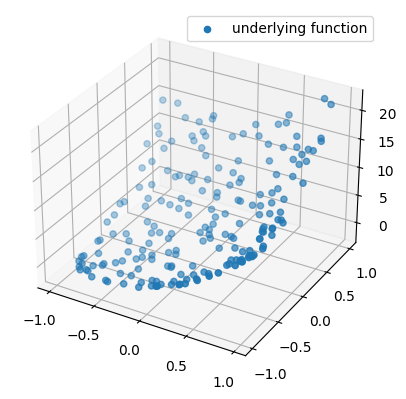

In [4]:
n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 7],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
#print(x**2)
#print("wt true")
#print(weights_true)
#print("y true")
#print(y_true)
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Using Gradient descent and mean sum of square errors to calculate the loss and gradient, to update the weights and bias such that loss is minized

In [5]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

First the weights and bias are initialized to a random value

Then calculate output by multiplying input with weights and adding bias

In backward function, the weights gradient and bias gradient are calculated based on the gradient values calculated

The weights and bias values are then updated in the update method


In [6]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [7]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Training with linear function

Using the linear function to train the non-linear data results in the loss being high, because the linear function is incapable of representing the this data

Epoch 0, loss 58.038563180157546
Epoch 1, loss 45.13169479739902
Epoch 2, loss 36.16077948197578
Epoch 3, loss 29.800897651556248
Epoch 4, loss 25.192183258305768
Epoch 5, loss 21.77394751052977
Epoch 6, loss 19.17831842163499
Epoch 7, loss 17.161996265043296
Epoch 8, loss 15.56242567600156
Epoch 9, loss 14.26961398316944
Epoch 10, loss 13.207980179436392
Epoch 11, loss 12.32463835296488
Epoch 12, loss 11.581812105172062
Epoch 13, loss 10.95190406077672
Epoch 14, loss 10.414274440657897
Epoch 15, loss 9.95312197020676
Epoch 16, loss 9.55607771294816
Epoch 17, loss 9.213261644948918
Epoch 18, loss 8.916641014413578
Epoch 19, loss 8.659586745717382
Epoch 20, loss 8.436560859000595
Epoch 21, loss 8.242891454222706
Epoch 22, loss 8.074606969899499
Epoch 23, loss 7.928311192285898
Epoch 24, loss 7.8010867949441725
Epoch 25, loss 7.690419270521079
Epoch 26, loss 7.594135770062283
Epoch 27, loss 7.510355099212502
Epoch 28, loss 7.437446261567058
Epoch 29, loss 7.373993696738364
Epoch 30, loss

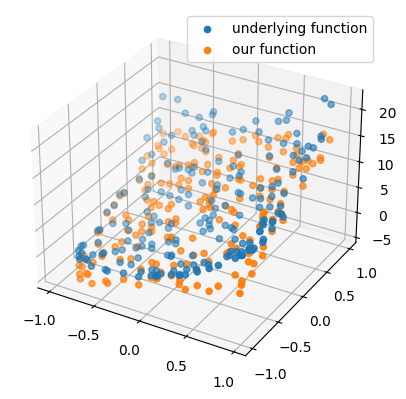

In [8]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

Introducing non-linearity in the neural network with a non-linear activation function - Relu. This enables the network to model complex relationships between input and output variables.

Without non-linear function, the output of each neuron would be a linear combination of the input variables - results in linear model - limitation in representing complex patterns in data

Some non-linear functions used : sigmoid, ReLU, Tanh.
Model complex relationships between input and output variables and learn more complex patterns in data

In [9]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
      #to debug
      #import pdb
      #pdb.set_trace()
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


#relu = Relu()
#input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
#print(relu(input_))
#print(relu.backward(input_))

Performing just one step of:
- forward pass
- backward propagation

52.42622485500719


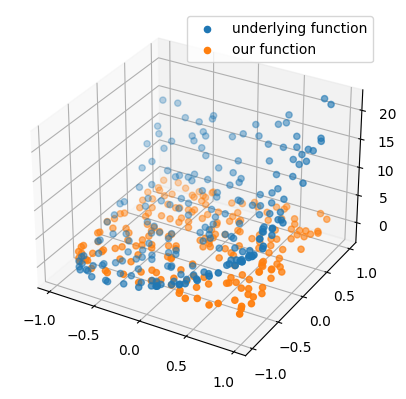

In [10]:
class Model:
  def __init__(self, input_dim, num_hidden1, num_hidden2):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hidden2, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 20, 20)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

Neural network for non-linear Regression

Activation function : Relu

Layers in neural network:

Input layer -> Hidden layer 1(10 neurons) -> Hidden layer 2(10 neurons) -> Output layers

Number of epochs : 50



Epoch 0, loss 52.42622485500719
Epoch 1, loss 21.470995817597597
Epoch 2, loss 7.946722777844355
Epoch 3, loss 4.805388462046948
Epoch 4, loss 3.8784439721127923
Epoch 5, loss 3.3453755632725826
Epoch 6, loss 2.924410058182863
Epoch 7, loss 2.5976875037825238
Epoch 8, loss 2.3232908321772907
Epoch 9, loss 2.1082175557650147
Epoch 10, loss 1.9233977954415946
Epoch 11, loss 1.817112334041005
Epoch 12, loss 1.6987601969247128
Epoch 13, loss 1.7196276537290032
Epoch 14, loss 1.6570104202328688
Epoch 15, loss 1.8379137066681783
Epoch 16, loss 1.7967971552341964
Epoch 17, loss 2.227893813589814
Epoch 18, loss 2.089549073183398
Epoch 19, loss 2.824690388899317
Epoch 20, loss 2.379932888375565
Epoch 21, loss 3.344440523525433
Epoch 22, loss 2.515889635388548
Epoch 23, loss 3.5245386517893125
Epoch 24, loss 2.4256722420066557
Epoch 25, loss 3.300208508652876
Epoch 26, loss 2.2443918380567793
Epoch 27, loss 2.9600280876423044
Epoch 28, loss 2.0413243329177555
Epoch 29, loss 2.62797105639689
Epoc

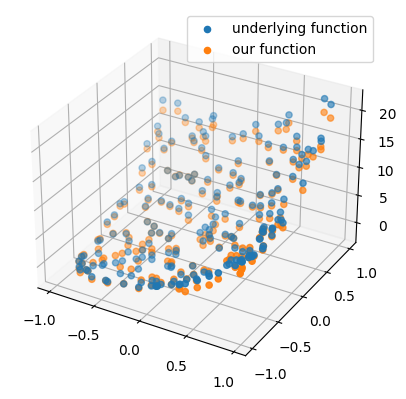

In [11]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=75)
plot_3d(x, y_true, model(x))

3 dimensions(cubic non linear equation)

x: (300, 3), weights: (3, 1), bias: (1,), y: (300, 1)


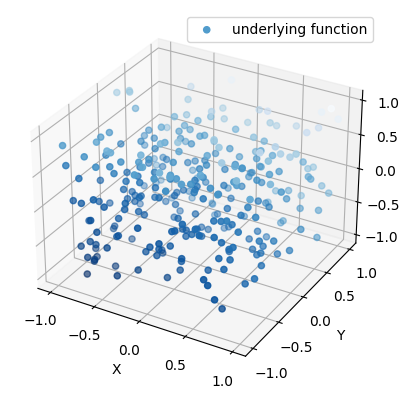

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import plotly.graph_objects as go

def plot_4d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y.flatten(), cmap='Blues_r', label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.flatten(), cmap='Reds_r', label='our function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()

n = 300
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 5, 7]]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x, y_true)

3 layer Neural network for non-linear regression from scratch using Numpy

Plotting 3d non linear data(cubic data). Weights as 2, 5, 9.

n denotes number of input data points

d denotes dimension

x is the set random n number of points generated in d dimensions

calculating actual values of y as y_true using x, actuals weights and bias

plotting x and y

x: (300, 3), weights: (3, 1), bias: (1,), y: (300, 1)


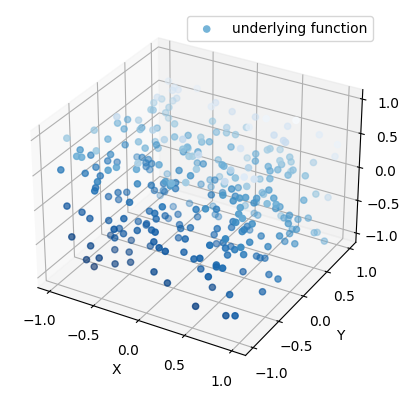

In [13]:
n = 300
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 5, 7]]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

#reducer = umap.UMAP(n_components=4)
#x_reduced = reducer.fit_transform(x)

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x, y_true)


Using Gradient descent and mean sum of square errors to calculate the loss and gradient, to update the weights and bias such that loss is minized

In [14]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

First the weights and bias are initialized to a random value

Then calculate output by multiplying input with weights and adding bias

In backward function, the weights gradient and bias gradient are calculated based on the gradient values calculated

The weights and bias values are then updated in the update method


In [15]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [16]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Training with linear function

Using the linear function to train the non-linear data results in the loss being high, because the linear function is incapable of representing the this data

Epoch 0, loss 90.89882085870622
Epoch 1, loss 88.98657440094534
Epoch 2, loss 87.13440230084974
Epoch 3, loss 85.3400930150858
Epoch 4, loss 83.60152127206767
Epoch 5, loss 81.91664464437329
Epoch 6, loss 80.28350025808992
Epoch 7, loss 78.70020163360977
Epoch 8, loss 77.16493565261611
Epoch 9, loss 75.67595964621053
Epoch 10, loss 74.23159859933415
Epoch 11, loss 72.83024246683014
Epoch 12, loss 71.4703435966802
Epoch 13, loss 70.1504142561275
Epoch 14, loss 68.8690242565695
Epoch 15, loss 67.62479867326945
Epoch 16, loss 66.4164156560927
Epoch 17, loss 65.24260432762694
Epoch 18, loss 64.10214276519027
Epoch 19, loss 62.993856063371446
Epoch 20, loss 61.916614473880784
Epoch 21, loss 60.86933161961955
Epoch 22, loss 59.85096277999854
Epoch 23, loss 58.86050324465662
Epoch 24, loss 57.89698673284302
Epoch 25, loss 56.95948387583732
Epoch 26, loss 56.04710075988593
Epoch 27, loss 55.158977527234676
Epoch 28, loss 54.294287032934434
Epoch 29, loss 53.452233555189196
Epoch 30, loss 52.63

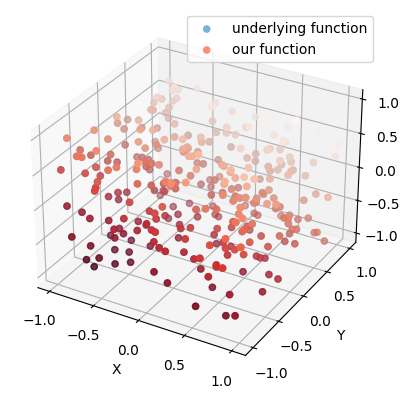

In [17]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.01, num_epochs=250)
plot_4d(x, y_true, linear(x))

Introducing non-linearity in the neural network with a non-linear activation function - Relu. This enables the network to model complex relationships between input and output variables.

Without non-linear function, the output of each neuron would be a linear combination of the input variables - results in linear model - limitation in representing complex patterns in data

Some non-linear functions used : sigmoid, ReLU, Tanh.
Model complex relationships between input and output variables and learn more complex patterns in data

In [18]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
      #to debug
      #import pdb
      #pdb.set_trace()
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

Performing just one step of:
- forward pass
- backward propagation

101.94619634170144


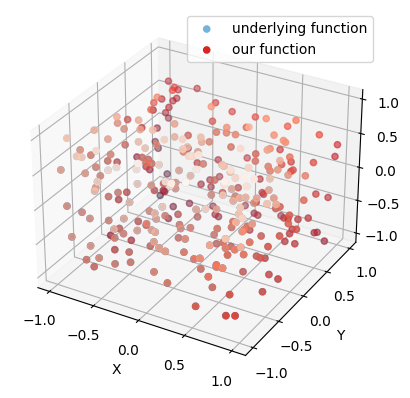

In [19]:
class Model:
  def __init__(self, input_dim, num_hidden1, num_hidden2):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hidden2, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 50, 50)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
#plot_3d(x, y_true, y_pred)
plot_4d(x, y_true, y_pred)

Neural network for non-linear Regression

Activation function : Relu

Layers in neural network:

Input layer -> Hidden layer 1(30 neurons) -> Hidden layer 2(30 neurons) -> Output layers

Number of epochs : 300

learning rate : 0.01

The objective is to minimize error, and here we see that the error is converging towards 0.


Epoch 0, loss 101.94619634170144
Epoch 1, loss 88.04986974618967
Epoch 2, loss 76.1146597139197
Epoch 3, loss 65.49385094410508
Epoch 4, loss 56.05433723497636
Epoch 5, loss 47.6030675495238
Epoch 6, loss 40.17086088492299
Epoch 7, loss 33.844970564872376
Epoch 8, loss 28.581353562473446
Epoch 9, loss 24.26230738748832
Epoch 10, loss 20.74644602527799
Epoch 11, loss 17.907026979684186
Epoch 12, loss 15.61768248441306
Epoch 13, loss 13.774196079674317
Epoch 14, loss 12.292950016358294
Epoch 15, loss 11.094292906853884
Epoch 16, loss 10.111247871231951
Epoch 17, loss 9.29309709678712
Epoch 18, loss 8.603316460316883
Epoch 19, loss 8.01732917437442
Epoch 20, loss 7.514300102300323
Epoch 21, loss 7.08037977927458
Epoch 22, loss 6.706998183064403
Epoch 23, loss 6.3805773105213595
Epoch 24, loss 6.090735572414791
Epoch 25, loss 5.831911557573824
Epoch 26, loss 5.599677821857814
Epoch 27, loss 5.392998309874794
Epoch 28, loss 5.2109998699246205
Epoch 29, loss 5.049044996885041
Epoch 30, loss 

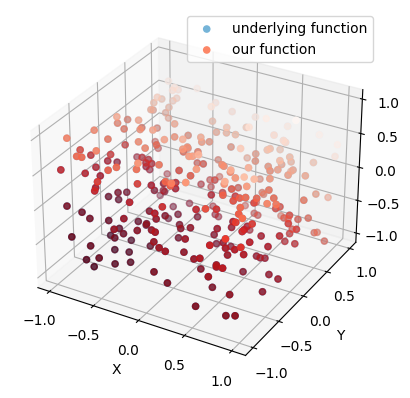

In [20]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=50)
plot_4d(x, y_true, model(x))